In [21]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

In [57]:
class MLP:
    def __init__(self,X_train,Y_train,lr=0.001,epochs=100):
        self.lr = lr
        self.epochs = epochs
        D_in = X_train.shape[1]
        H1 = 128
        H2 = 32
        D_out = Y_train.shape[1]


        self.W1 = np.random.randn(D_in,H1)
        self.W2 = np.random.randn(H1,H2)
        self.W3 = np.random.randn(H2,D_out)

        self.B1 = np.random.randn(1,H1)
        self.B2 = np.random.randn(1,H2)
        self.B3 = np.random.randn(1,D_out)

    def sigmoid(self,X):
       return 1 / (1 + np.exp(-X))

    def softmax(self,X):
       return np.exp(X) / np.sum(np.exp(X))

    def root_mean_squired_error(self,Y_gt,Y_pred):
        return np.sqrt(np.mean((Y_gt - Y_pred)**2))
    
    def forward(self,x,y):
        x = x.reshape(-1, 1)
        net1 = x.T @ self.W1 + self.B1
        out1 = self.sigmoid(net1)
        net2 = out1 @ self.W2 + self.B2
        out2 = self.sigmoid(net2)
        net3 = out2 @ self.W3 + self.B3
        out3 = self.softmax(net3)

        y_pred = out3

        return y_pred,out1,out2

    def backward(self,x,y):
        x = x.reshape(-1, 1)
        #layer3
        y_pred,out1,out2 = self.forward(x,y)
        error = -2 * (y - y_pred)
        grad_B3 = error
        grad_W3 = out2.T @ error

        #layer 2
        error =  error @ self.W3.T * out2 *(1 - out2)
        grad_B2 = error
        grad_W2 =  out1.T @ error

        # layer1
        error = error @ self.W2.T * out1 *(1 - out1)
        grad_B1 = error
        grad_W1 = x @ error

        return grad_W1,grad_W2,grad_W3,grad_B1,grad_B2,grad_B3


    def update(self,x,y):
        grad_W1,grad_W2,grad_W3,grad_B1,grad_B2,grad_B3 = self.backward(x,y)
        self.W1 = self.W1 - self.lr * grad_W1
        self.B1 = self.B1 - self.lr * grad_B1

        #layer2
        self.W2 = self.W2 - self.lr * grad_W2
        self.B2 = self.B2 - self.lr * grad_B2

        #layer3
        self.W3 = self.W3 -  self.lr * grad_W3
        self.B3 = self.B3 - self.lr * grad_B3

    
  
    def fit(self,X_train,Y_train,X_test,Y_test):
        scores_train = []
        scores_test = []
        losses_train = []
        losses_test = []
        for epoch in range(self.epochs):
            Y_pred_train = []
        # train
            for x,y in zip(X_train,Y_train):
                y_pred,out1,out2 = self.forward(x,y)
                Y_pred_train.append(y_pred.T)
                
                # backward
                grad_W1,grad_W2,grad_W3,grad_B1,grad_B2,grad_B3 = self.backward(x,y)

                self.update(x,y)
                
            acc_train,loss_train = self.evaluate(X_train,Y_train,Y_pred_train,metric='train')
            scores_train.append(acc_train)
            losses_train.append(loss_train)

            Y_pred_test = []
        # train
            for x,y in zip(X_test,Y_test):
                y_pred_test,out1,out2 = self.forward(x,y)
                Y_pred_test.append(y_pred_test.T)

            acc_test,loss_test = self.evaluate(X_test,Y_test,Y_pred_test,metric='test')

            scores_test.append(acc_test)
            losses_test.append(loss_test)

        return scores_train,scores_test,losses_train,losses_test
                
               
    
    def evaluate(self,X,Y,Y_pred,metric):

        
        Y_pred = np.array(Y_pred).reshape(-1, 10)
        

        
        loss = self.root_mean_squired_error(Y_pred, Y)

        acc = np.mean(np.argmax(Y_pred, axis=1) == np.argmax(Y, axis=1))

        if metric == 'train':

            print('Accuracy Train Data:',acc)
            print('Loss Train Data:',loss)
        elif metric == 'test':
            print('Accuracy Test Data:',acc)
            print('Loss Test Data:',loss)

        return acc,loss

        

    def predict(self,image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = image.reshape(64,1)

        x = image

        net1 = x.T @ self.W1 + self.B1
        out1 = self.sigmoid(net1)
        net2 = out1 @ self.W2 + self.B2
        out2 = self.sigmoid(net2)
        net3 = out2 @ self.W3 + self.B3
        out3 = self.softmax(net3)

        y_pred = out3

        print(np.argmax(y_pred))


In [58]:
dataset = load_digits()
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y]

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1347, 64)
(1347, 10)
(450, 64)
(450, 10)


In [60]:
model = MLP(X_train,Y_train,lr=0.001,epochs=64)
scores_train,scores_test,losses_train,losses_test= model.fit(X_train,Y_train,X_test,Y_test)

Accuracy Train Data: 0.13956941351150706
Loss Train Data: 0.32555305822571473
Accuracy Test Data: 0.17555555555555555
Loss Test Data: 0.3047738290770836
Accuracy Train Data: 0.2635486265775798
Loss Train Data: 0.2902575849526688
Accuracy Test Data: 0.2733333333333333
Loss Test Data: 0.2895147470546934
Accuracy Train Data: 0.3838158871566444
Loss Train Data: 0.27442017112304407
Accuracy Test Data: 0.36666666666666664
Loss Test Data: 0.2790734181976487
Accuracy Train Data: 0.4795842613214551
Loss Train Data: 0.2633268516576953
Accuracy Test Data: 0.4266666666666667
Loss Test Data: 0.2709041037665605
Accuracy Train Data: 0.5515961395694136
Loss Train Data: 0.25363923387396137
Accuracy Test Data: 0.48
Loss Test Data: 0.26361817456617326
Accuracy Train Data: 0.6028210838901262
Loss Train Data: 0.2448004891778512
Accuracy Test Data: 0.5
Loss Test Data: 0.25691570802964736
Accuracy Train Data: 0.6481069042316259
Loss Train Data: 0.2362347180935042
Accuracy Test Data: 0.5377777777777778
Loss T

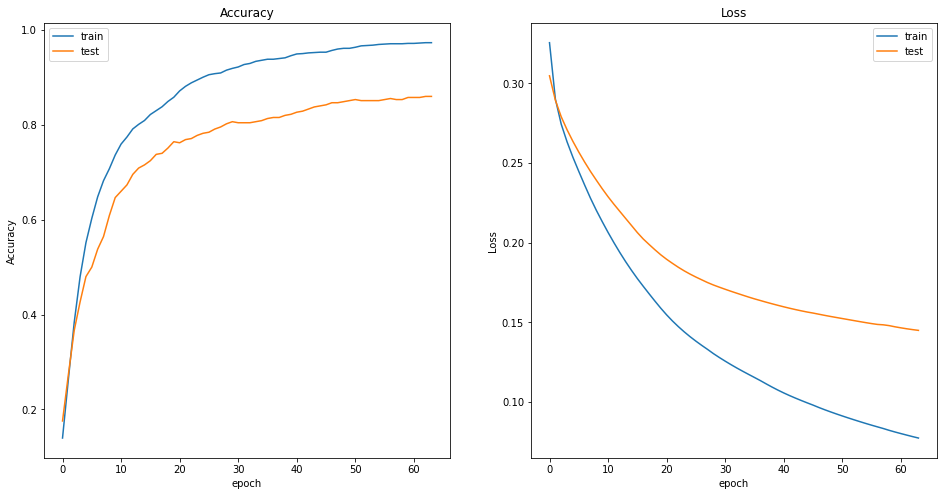

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(scores_train)
ax1.plot(scores_test)
ax1.set_title("Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(['train','test'])

ax2.plot(losses_train)
ax2.plot(losses_test)
ax2.set_title("Loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
ax2.legend(['train','test'])

In [62]:
model.predict('test3.png')

1
